Vamos analisar qual seria o ROI (média e desvio)  de apostar em todos os jogos de amostras de 5000 jogos em cada mês do ano

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Carrega o CSV e seleciona apenas a data e o pl_u
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df=pd.read_csv('../input/goalline.csv', parse_dates=['data_inicio'],date_parser=dateparse,  usecols=['data_inicio', 'pl_u'] )

#Exibe as 5 primeiras linhas do DataFrame
df.head(5)

,data_inicio,pl_u
0,2019-05-07 23:15:00,0.0000
1,2019-05-07 23:15:00,0.0000
2,2019-05-07 22:00:00,-1.0000
3,2019-05-07 22:00:00,0.4125
4,2019-05-07 21:30:00,0.8750


In [2]:
#Cria uma lista com DataFrame para cada mês do ano
dfs_mes=[ df[ df['data_inicio'].map(lambda x: x.month) == i+1 ]  for i in range(12)    ]



In [3]:
#Print nome dos campos
print('{:<6} {:<10} {:<10}'.format('mês', 'média', 'desvio_padrão') )

#Para cada mês do ano
for i in range(12):
    ROIs_medios=[]
    #Faz 10 mil simulações
    for _ in range(10000):
        #Selecionando um amostra aleatório de 5000 jogos e calcula o o ROI médio
        ROIs_medios+=[ dfs_mes[i].sample(5000).pl_u.mean()]
    
    #Exibe o mês, a  média e o desvio padrão
    ROIs_medios=np.array(ROIs_medios)
    print('{:<6} {:<10.2%} {:<10.2%}'.format(i+1, ROIs_medios.mean(), ROIs_medios.std()) )

mês    média      desvio_padrão
1      -0.95%     1.05%     
2      -0.89%     1.10%     
3      -2.28%     1.11%     
4      -2.75%     1.12%     
5      -3.53%     1.09%     
6      -4.19%     0.96%     
7      -0.80%     1.01%     
8      -1.56%     1.06%     
9      -2.64%     1.12%     
10     -2.72%     1.11%     
11     -1.86%     1.07%     
12     -2.22%     1.04%     


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


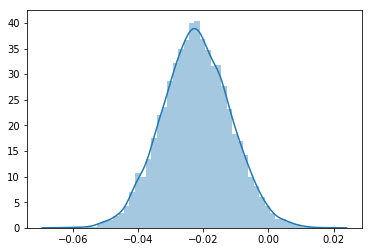

In [4]:
import seaborn as sns

#Vamos visualiar o histograma para para o mês de Dezembro (o último processado)
sns.distplot(ROIs_medios)